In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Load the Schroeder and Epley (2015) Study 4 data
file_id = '0Bz-rhZ21ShvOei1MM24xNndnQ00'
resource_key = '0-gBQiGhF6zp2cH8g20zifJg'

# Construct a direct download link
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}&resourcekey={resource_key}'
df = pd.read_csv(direct_link)

df.head()  # See the first few rows

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
3,0,4,3,6,6,6,6,5,40,2,...,4,4.583333,5.722222,6.638889,0.416667,-1.388889,-0.972222,3.333333,4.666667,4
4,0,2,3,1,2,2,8,2,32,2,...,5,4.583333,5.722222,6.638889,-2.583333,-3.722222,-4.305556,1.000000,1.333333,1


In [3]:
audio_group = df[df['CONDITION'] == 1]['Intellect_Rating']
transcript_group = df[df['CONDITION'] == 0]['Intellect_Rating']

audio_group.mean()
audio_group.std()
len(audio_group)

21

(0.0, 10.0)

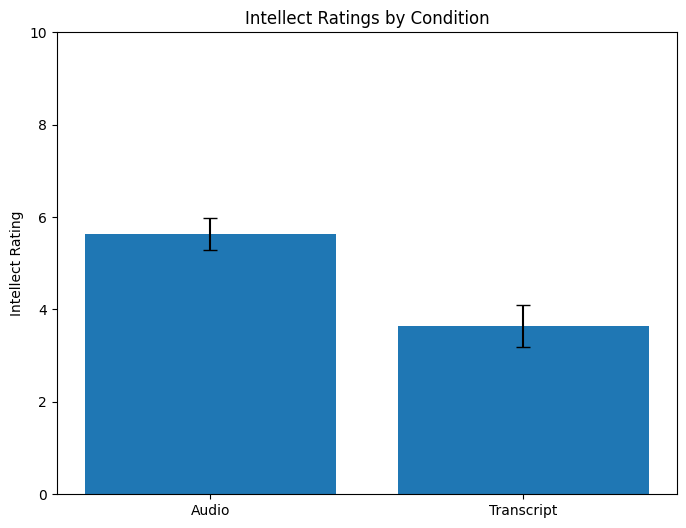

In [4]:
# Calculate means and SEMs
means = [audio_group.mean(), transcript_group.mean()]
sems = [audio_group.sem(), transcript_group.sem()]

# Create plot
plt.figure(figsize=(8, 6))
plt.bar(['Audio', 'Transcript'], means, yerr=sems, capsize=5)
plt.ylabel('Intellect Rating')
plt.title('Intellect Ratings by Condition')
plt.ylim(0, 10)  # Adjust based on your scale

In [5]:
print(f"Audio: M = {audio_group.mean():.2f}, SD = {audio_group.std():.2f}, n = {len(audio_group)}")
print(f"Transcript: M = {transcript_group.mean():.2f}, SD = {transcript_group.std():.2f}, n = {len(transcript_group)}")

Audio: M = 5.63, SD = 1.61, n = 21
Transcript: M = 3.65, SD = 1.91, n = 18


In [6]:
t_stat, p_value = stats.ttest_ind(audio_group, transcript_group)
print(f"Independent samples t-test results:")
print(f"  t({len(audio_group) + len(transcript_group) - 2}) = {t_stat:.2f}")
print(f"  p = {p_value:.3f}")

Independent samples t-test results:
  t(37) = 3.53
  p = 0.001


In [7]:
# Pooled standard deviation
n1 = len(audio_group)
n2 = len(transcript_group)
sd_pooled = np.sqrt(((n1-1)*audio_group.std(ddof=0)**2 + 
                      (n2-1)*transcript_group.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group.mean() - transcript_group.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

Cohen's d: 1.16
